# 데이터 세트 소개

-  Olist Store 에서 이루어진 주문의 브라질 전자 상거래 공개 데이터 세트이다 .
- 이 데이터 세트는 **2016년부터 2018년까지 브라질의 여러 마켓플레이스에서 이루어진 10만 건의 주문 정보**가 있으나, 분석 과정에서는 3개월(9, 10, 12월)의 데이터만 존재하는 2016년은 제외하고 **2017년부터 분석**하였다.
> 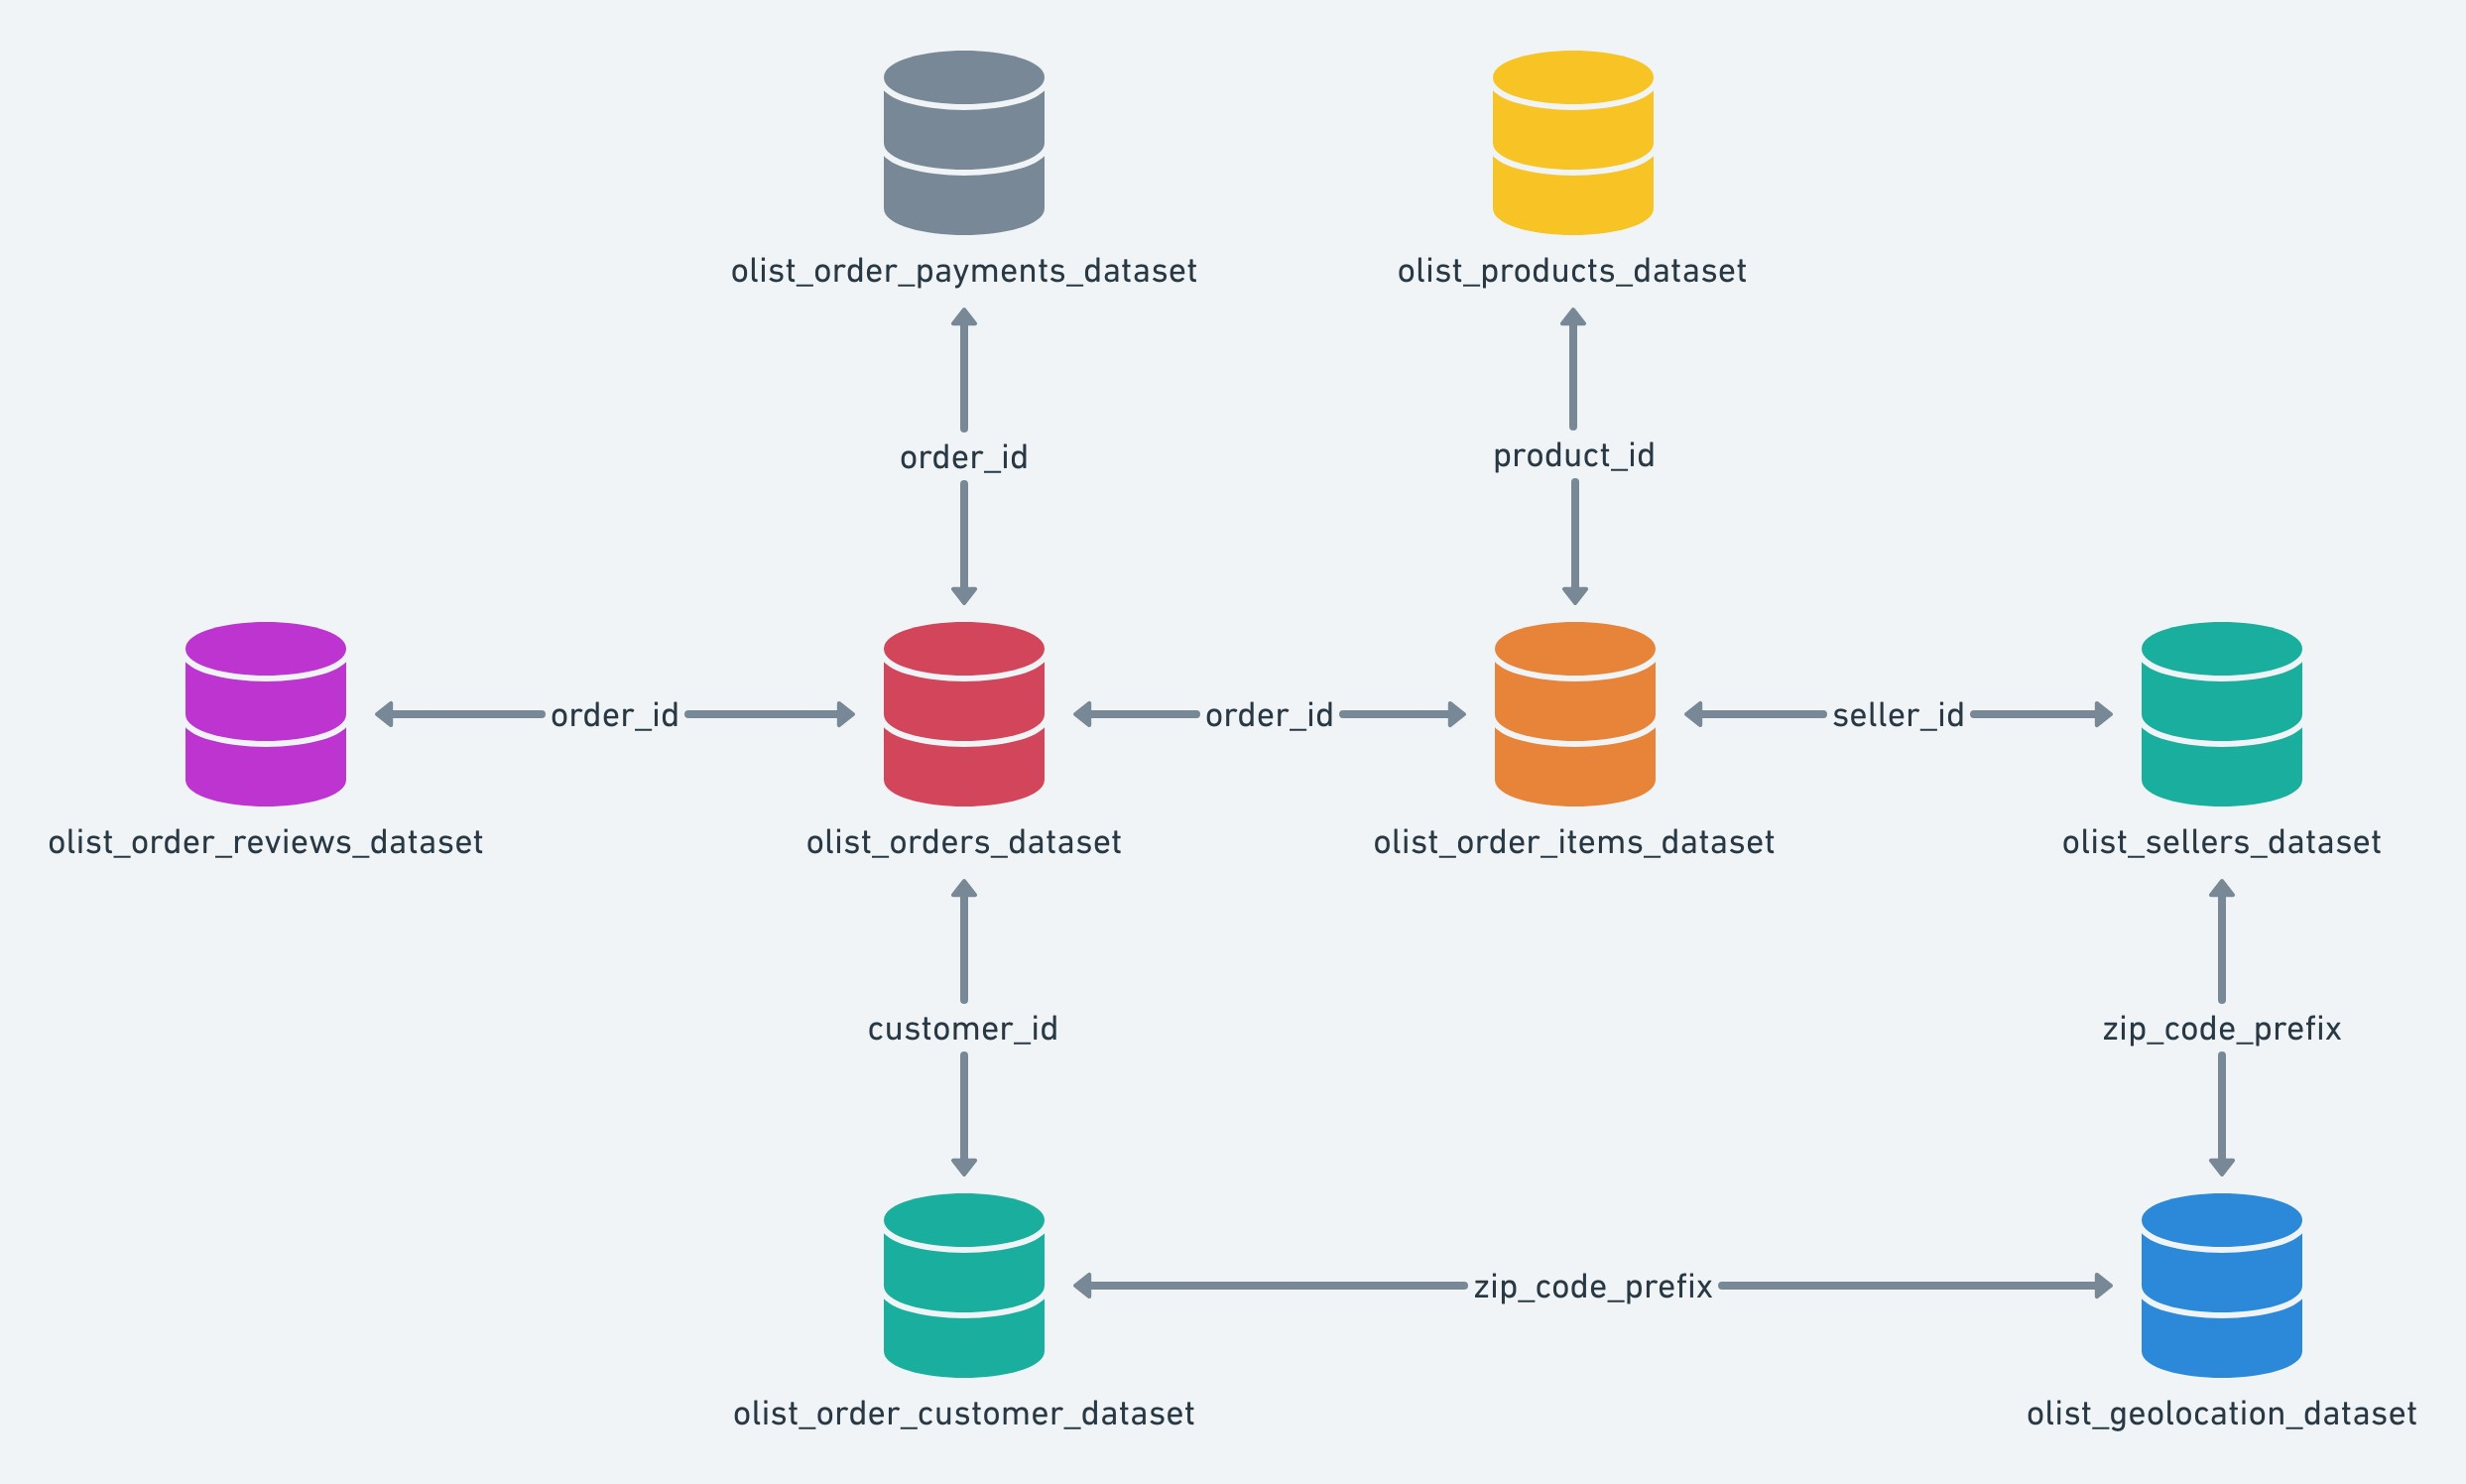
> - 출처: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# Colab 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 라이브러리

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 프레젠테이션이나 보고서와 같은 다양한 매체에 활용할 수 있도록 스타일링
sns.set_context('notebook')

In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 데이터 확인

In [3]:
data_path = './drive/MyDrive/Datathon/archive'

In [5]:
paths = glob(f'{data_path}/*')
paths

['./drive/MyDrive/Datathon/archive/olist_customers_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_order_reviews_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_products_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_order_items_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_orders_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_sellers_dataset.csv',
 './drive/MyDrive/Datathon/archive/product_category_name_translation.csv',
 './drive/MyDrive/Datathon/archive/olist_geolocation_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_order_payments_dataset.csv']

In [6]:
# olist_customers_dataset.csv

customers = pd.read_csv(paths[0])
display(customers.shape, customers.head(2))

(99441, 5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
# olist_order_reviews_dataset.csv

reviews = pd.read_csv(paths[1])
display(reviews.shape, reviews.head(2))

(99224, 7)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [10]:
# olist_products_dataset.csv

products = pd.read_csv(paths[2])
display(products.shape, products.head(2))

(32951, 9)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
# olist_order_items_dataset.csv

order_items = pd.read_csv(paths[3])
display(order_items.shape, order_items.head(2))

(112650, 7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [13]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
# olist_orders_dataset.csv

orders = pd.read_csv(paths[4])
display(orders.shape, orders.head(2))

(99441, 8)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
# olist_sellers_dataset.csv

sellers = pd.read_csv(paths[5])
display(sellers.shape, sellers.head(2))

(3095, 4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [17]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [18]:
# product_category_name_translation.csv

product_category_name = pd.read_csv(paths[6])
display(product_category_name.shape, product_category_name.head(2))

(71, 2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [19]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [20]:
# olist_geolocation_dataset.csv

geolocation = pd.read_csv(paths[7])
display(geolocation.shape, geolocation.head(2))

(1000163, 5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [21]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [22]:
# olist_order_payments_dataset.csv

order_payments = pd.read_csv(paths[8])
display(order_payments.shape, order_payments.head(2))

(103886, 5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [23]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# 데이터 하나로 merge

In [24]:
df = pd.DataFrame()

# ①orders에 ②item 붙이기
df = orders.merge(order_items, on='order_id', how='outer')

# df에 ③payment 붙이기
df = df.merge(order_payments, on='order_id', how='outer')

# ④리뷰 붙이기
df = df.merge(reviews, on='order_id', how='outer')

# ⑤셀러 붙이기
df = df.merge(sellers, on='seller_id', how='outer')

# ⑥products 붙이기
df = df.merge(products, on='product_id', how='outer')

# ⑦customer 붙이기
df = df.merge(customers, on='customer_id', how='outer')

# ⑧카테고리 영어 붙여주기
df = df.merge(product_category_name, on = "product_category_name", how = 'outer')

display(df.shape, df.head(2))

(119143, 40)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares


In [25]:
# 컬럼명 확인
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name_english'],
      dtype='object')

In [26]:
df_cp = df.copy()

In [27]:
df_cp.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares


# order_purchase_timestamp 파생변수 만들기

In [28]:
df_cp["order_purchase_timestamp"] = pd.to_datetime(df_cp["order_purchase_timestamp"])

# 연 (4자리 숫자)
df_cp["order_purchase_year"] = df_cp["order_purchase_timestamp"].dt.year

# 월 (숫자)
df_cp["order_purchase_month"] = df_cp["order_purchase_timestamp"].dt.month

# 월 (문자)
df_cp["order_purchase_month_name"] = df_cp["order_purchase_timestamp"].dt.month_name()

# 연월 (1~9월 앞에 0을 붙이기 위해 zfill(2)를 사용)
df_cp["order_purchase_year_month"] = df_cp["order_purchase_year"].astype(str) + df_cp["order_purchase_month"].astype(str).str.zfill(2)

# 일
df_cp["order_purchase_day"] = df_cp["order_purchase_timestamp"].dt.day

# 연월일
df_cp["order_purchase_ymd"] = df_cp["order_purchase_year"].astype(str) + \
                                         df_cp["order_purchase_month"].astype(str).str.zfill(2) + \
                                         df_cp["order_purchase_day"].astype(str).str.zfill(2)

# 요일수치형(월:0 ~ 일:6)
df_cp["order_purchase_dayofweek"] = df_cp["order_purchase_timestamp"].dt.dayofweek
# 요일
df_cp["order_purchase_dayofweek_name"] = df_cp["order_purchase_timestamp"].dt.day_name()

# 시간
df_cp["order_purchase_hour"] = df_cp["order_purchase_timestamp"].dt.hour
# 0~5시는 새벽, 5~9시는 아침, 9~17시는 낮, 17~21시는 저녁(오후), 21~24시는 밤
condition_list = [df_cp["order_purchase_hour"] > 20, df_cp["order_purchase_hour"].between(17, 20), \
                  df_cp["order_purchase_hour"].between(9, 17),  df_cp["order_purchase_hour"].between(5, 9), \
                  df_cp["order_purchase_hour"] < 5]
choice_list = ['Night', 'Afternoon', 'Noon', 'Morning', 'Dawn']
df_cp["order_purchase_time_day"] = np.select(condition_list, choice_list, 0)

In [29]:
# 파생변수가 잘 생겼는지 확인
df_cp.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_day,order_purchase_ymd,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017,10,October,201710,2,20171002,0,Monday,10,Noon
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,2017,10,October,201710,2,20171002,0,Monday,10,Noon


## 연월별 주문량 추이 확인

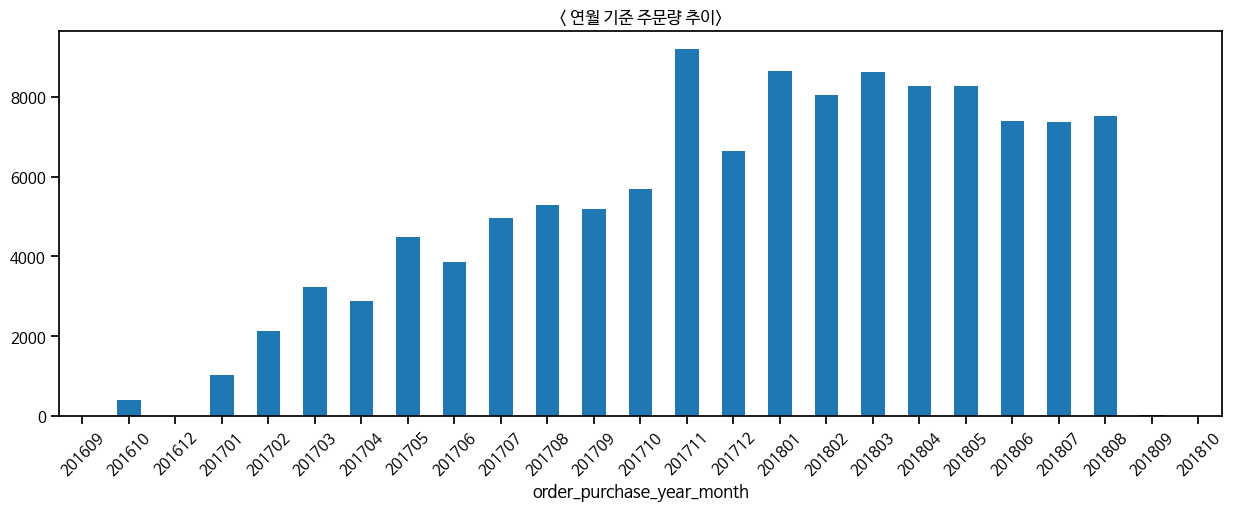

In [32]:
year_month_chart = df_cp.groupby("order_purchase_year_month")["order_id"].count()
year_month_chart.plot(kind= 'bar', figsize= (15,5), rot=45,
                      title="< 연월 기준 주문량 추이>");

## 요일별 주문량 확인

In [34]:
palette = 'light:b_r'

In [35]:
dayofweek_chart = df_cp.groupby("order_purchase_dayofweek_name")["order_id"].count().sort_values()
dayofweek_chart.to_frame()

,order_id
order_purchase_dayofweek_name,
Saturday,12894
Sunday,14096
Friday,17006
Thursday,17826
Wednesday,18640
Tuesday,19315
Monday,19366


In [36]:
day_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

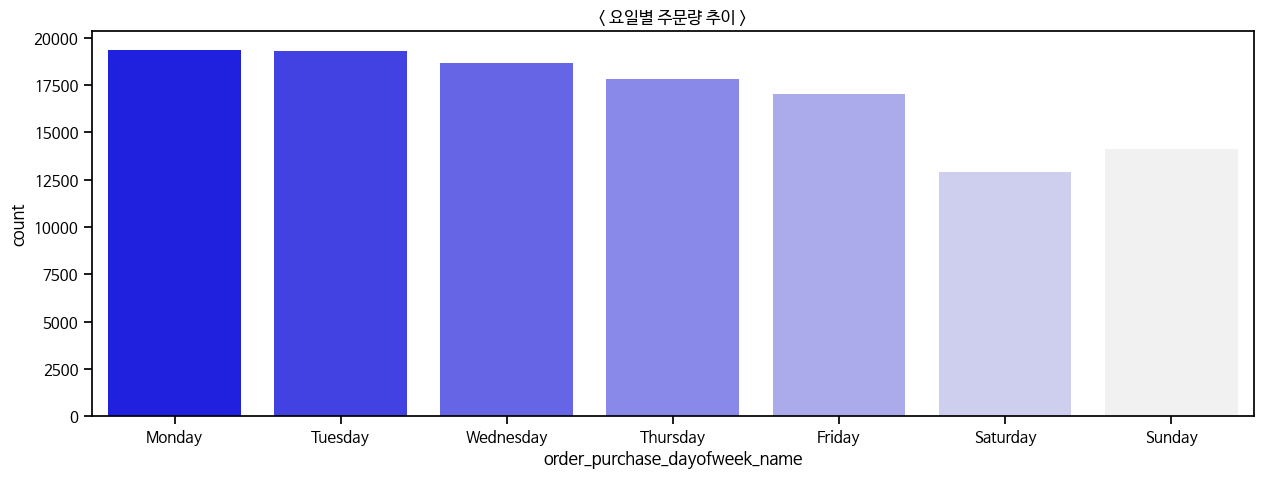

In [37]:
plt.figure(figsize=(15, 5))
plt.title("< 요일별 주문량 추이 >")
sns.countplot(data=df_cp, x="order_purchase_dayofweek_name", order=day_list, palette=palette);

## 시간대별 주문량 확인
- `0~5시`는 새벽, `5~9시`는 아침, `9~17`시는 낮, `17~21시`는 저녁(오후), `21~24시`는 밤
- 이러한 시간대는 임의로 지정했기 때문에, 분석자에 따라서 시간대 구분은 달라질 수 있다.

In [38]:
time_day_chart = df_cp.groupby("order_purchase_time_day")["order_id"].count()
time_day_chart.to_frame()

,order_id
order_purchase_time_day,
Afternoon,28699
Dawn,5510
Morning,5783
Night,19271
Noon,59880


In [39]:
time_day_list = ["Dawn", "Morning", "Noon", "Afternoon", "Night"]

In [40]:
# time_day_chart.reindex(index=time_day_list)
value = time_day_chart.reindex(index=time_day_list).values.tolist()
value

[5510, 5783, 59880, 28699, 19271]

In [41]:
import matplotlib.patches as mpatches #범례 그리기 위한 라이브러리

# 범례 지정하기

variable_1 = mpatches.Patch(color='tab:blue',label='Dawn: 0~5시')
variable_2 = mpatches.Patch(color='tab:orange',label='Morning: 5~9시')
variable_3 = mpatches.Patch(color='tab:green', label='Noon: 9~17시')
variable_4 = mpatches.Patch(color='C3',label='Afternoon: 17~21시')
variable_5 = mpatches.Patch(color='C4', label='Night: 21~24시')

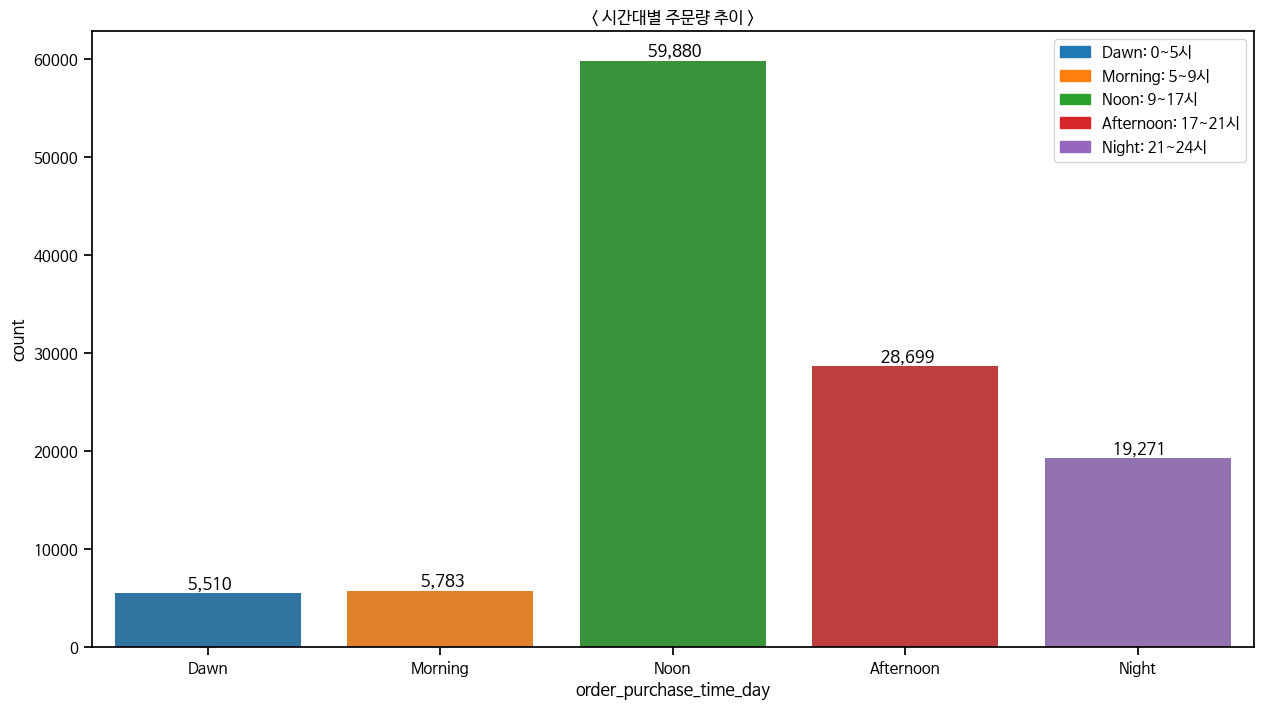

In [42]:
plt.figure(figsize=(15, 8))
plt.title("< 시간대별 주문량 추이 >")
ax = sns.countplot(data=df_cp, x="order_purchase_time_day", order=time_day_list)

n = 0
for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2, # x = x좌표
            y = patch.get_height() + len(df_cp)*0.004, # y = y좌표
            s = f'{value[n]: ,d}', # s = 텍스트로 쓰고자 하는 내용
            ha = 'center') # ha = 데이터 수평 정렬(horizontal alignment)
    n += 1

# 범례 나타내기
ax.legend(handles=[variable_1, variable_2, variable_3, variable_4, variable_5,], loc='upper right');

## 연도별, 월별 주문량 확인

In [43]:
month_name_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',\
                   'September', 'October', 'November', 'December']

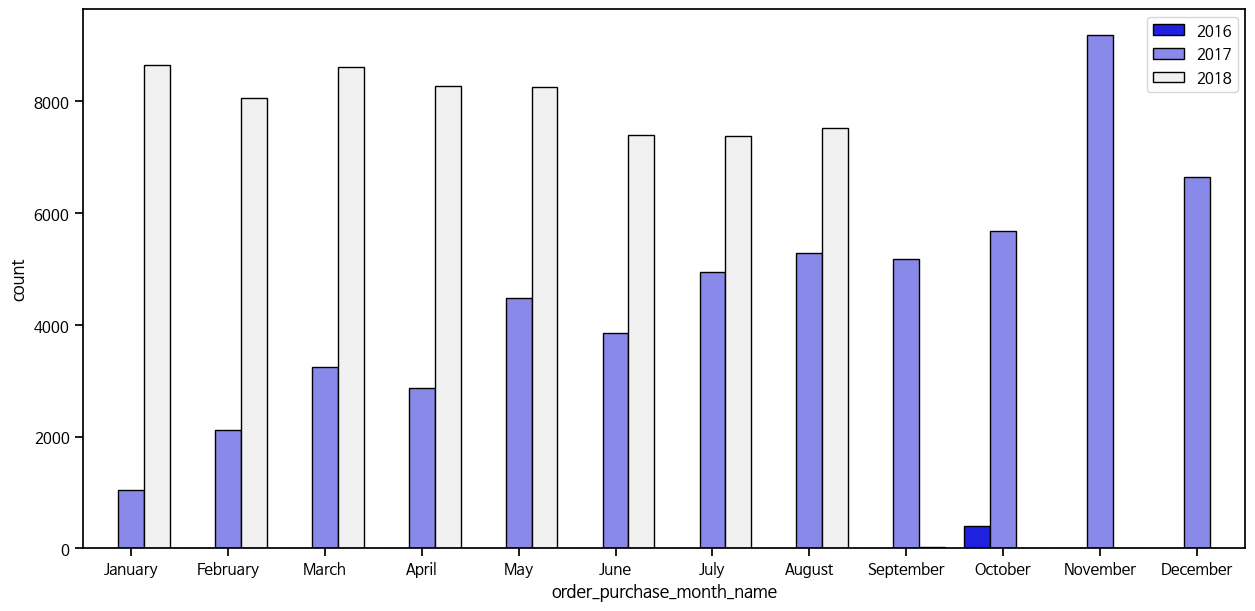

In [44]:
_, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.countplot(
    data=df_cp,
    x='order_purchase_month_name',
    hue='order_purchase_year',
    order=month_name_list,
    palette=palette,
    ax=ax,
    edgecolor='black'
)

ax.legend(loc='upper right');

# 가장 많이 팔리는(주문 되는) 상품 TOP 10?
- 'product_category_name','product_category_name_english'컬럼별로 주문건수(order_id) 확인

In [45]:
rank_by_customer_order = df_cp.groupby([
    'product_category_name','product_category_name_english'
    ])['order_id'].count().sort_values(ascending=False)
rank_by_customer_order

product_category_name          product_category_name_english
cama_mesa_banho                bed_bath_table                   11988
beleza_saude                   health_beauty                    10032
esporte_lazer                  sports_leisure                    9004
moveis_decoracao               furniture_decor                   8832
informatica_acessorios         computers_accessories             8150
                                                                ...  
artes_e_artesanato             arts_and_craftmanship               24
la_cuisine                     la_cuisine                          16
cds_dvds_musicais              cds_dvds_musicals                   14
fashion_roupa_infanto_juvenil  fashion_childrens_clothes            8
seguros_e_servicos             security_and_services                2
Name: order_id, Length: 71, dtype: int64

In [46]:
# 주문 상위 10개 품목
order_top10 = rank_by_customer_order[:10]
order_top10.to_frame()

,,order_id
product_category_name,product_category_name_english,
cama_mesa_banho,bed_bath_table,11988
beleza_saude,health_beauty,10032
esporte_lazer,sports_leisure,9004
moveis_decoracao,furniture_decor,8832
informatica_acessorios,computers_accessories,8150
utilidades_domesticas,housewares,7380
relogios_presentes,watches_gifts,6213
telefonia,telephony,4726
ferramentas_jardim,garden_tools,4590


In [47]:
temp = order_top10.reset_index(level=1)
temp

,product_category_name_english,order_id
product_category_name,,
cama_mesa_banho,bed_bath_table,11988
beleza_saude,health_beauty,10032
esporte_lazer,sports_leisure,9004
moveis_decoracao,furniture_decor,8832
informatica_acessorios,computers_accessories,8150
utilidades_domesticas,housewares,7380
relogios_presentes,watches_gifts,6213
telefonia,telephony,4726
ferramentas_jardim,garden_tools,4590


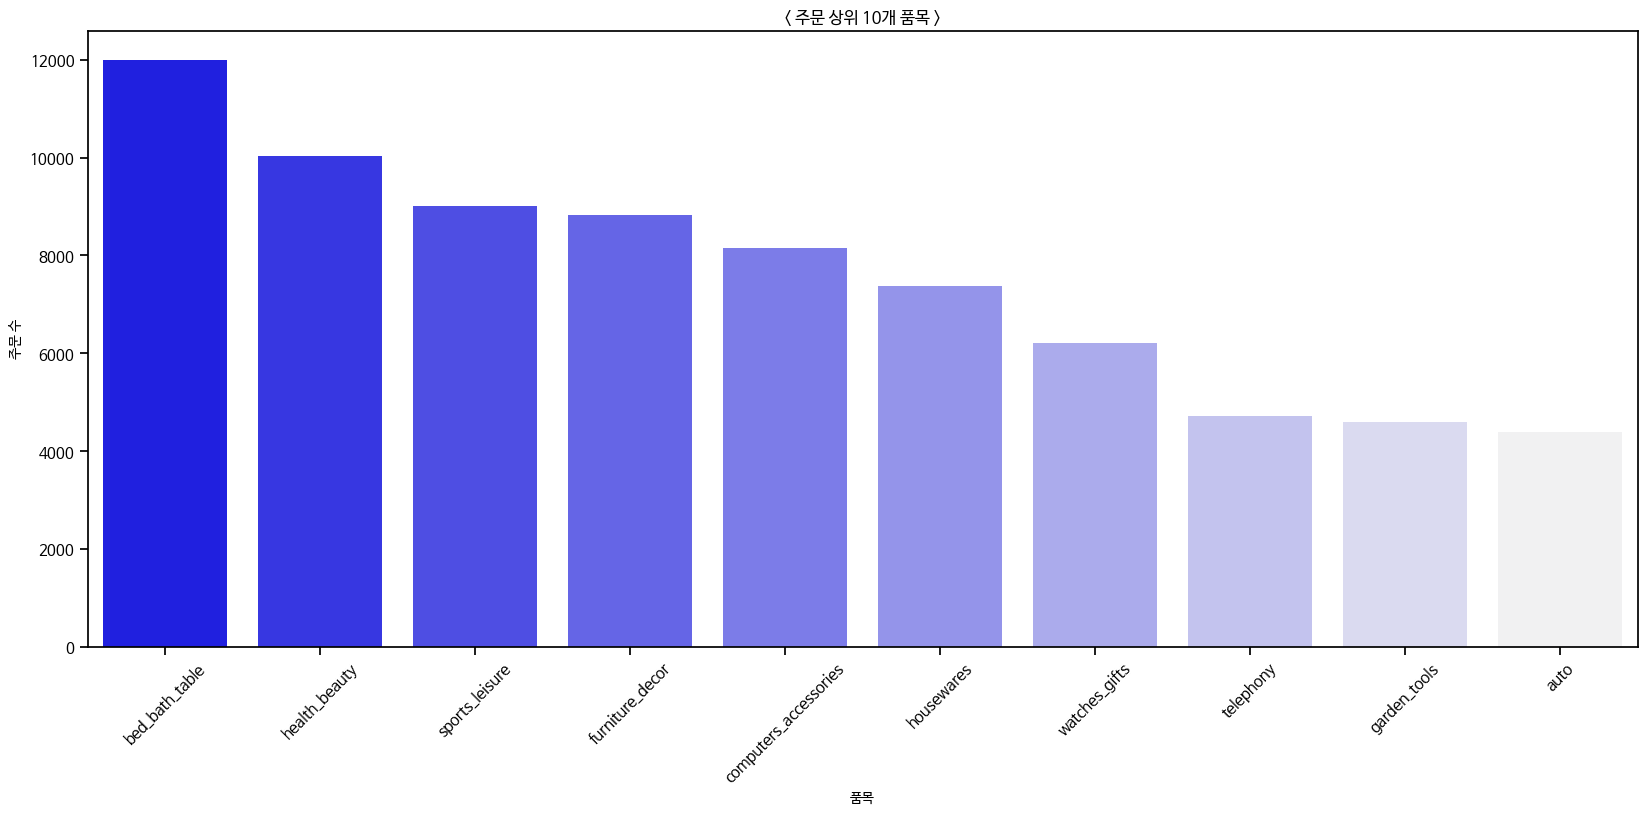

In [48]:
plt.figure(figsize=(20, 8))
plt.title("< 주문 상위 10개 품목 >", fontsize=12)
sns.barplot(data=temp, x="product_category_name_english", y='order_id', palette=palette)

plt.xticks(rotation=45)
plt.ylabel('주문 수', fontsize=10)
plt.xlabel('품목', fontsize=10);

# 매출 기준, 상위 15개 품목 확인
- 매출 상위 top15 품목 확인

In [49]:
# 전체 매출
total_price = df_cp["payment_value"].sum()
total_price

20579664.01

In [50]:
# 가격 기준 내림차순 정렬
sales_rank = df_cp.groupby("product_category_name_english").agg({"payment_value":"sum"}).sort_values("payment_value", ascending=False)
# 비율 컬럼 추가
# 소수 2째 자리까지 표현
sales_rank["rate"] = round(sales_rank['payment_value'] / total_price, 2)
# 누적 비율
sales_rank["cumulation"] = sales_rank["rate"].cumsum()
sales_rank

,payment_value,rate,cumulation
product_category_name_english,,,
bed_bath_table,1743998.80,0.08,0.08
health_beauty,1662963.59,0.08,0.16
computers_accessories,1599481.06,0.08,0.24
furniture_decor,1443963.61,0.07,0.31
watches_gifts,1430553.48,0.07,0.38
...,...,...,...
flowers,2213.01,0.00,0.92
home_comfort_2,1710.54,0.00,0.92
cds_dvds_musicals,1199.43,0.00,0.92


In [51]:
# 매출의 약 80%가 top15에서 발생하는 것 확인
top15 = sales_rank.head(16)
top15 = top15.reset_index()
top15

,product_category_name_english,payment_value,rate,cumulation
0,bed_bath_table,1743998.80,0.08,0.08
1,health_beauty,1662963.59,0.08,0.16
2,computers_accessories,1599481.06,0.08,0.24
3,furniture_decor,1443963.61,0.07,0.31
4,watches_gifts,1430553.48,0.07,0.38
5,sports_leisure,1400223.07,0.07,0.45
6,housewares,1097900.09,0.05,0.50
7,auto,855095.68,0.04,0.54
8,garden_tools,840721.59,0.04,0.58
9,cool_stuff,781933.97,0.04,0.62


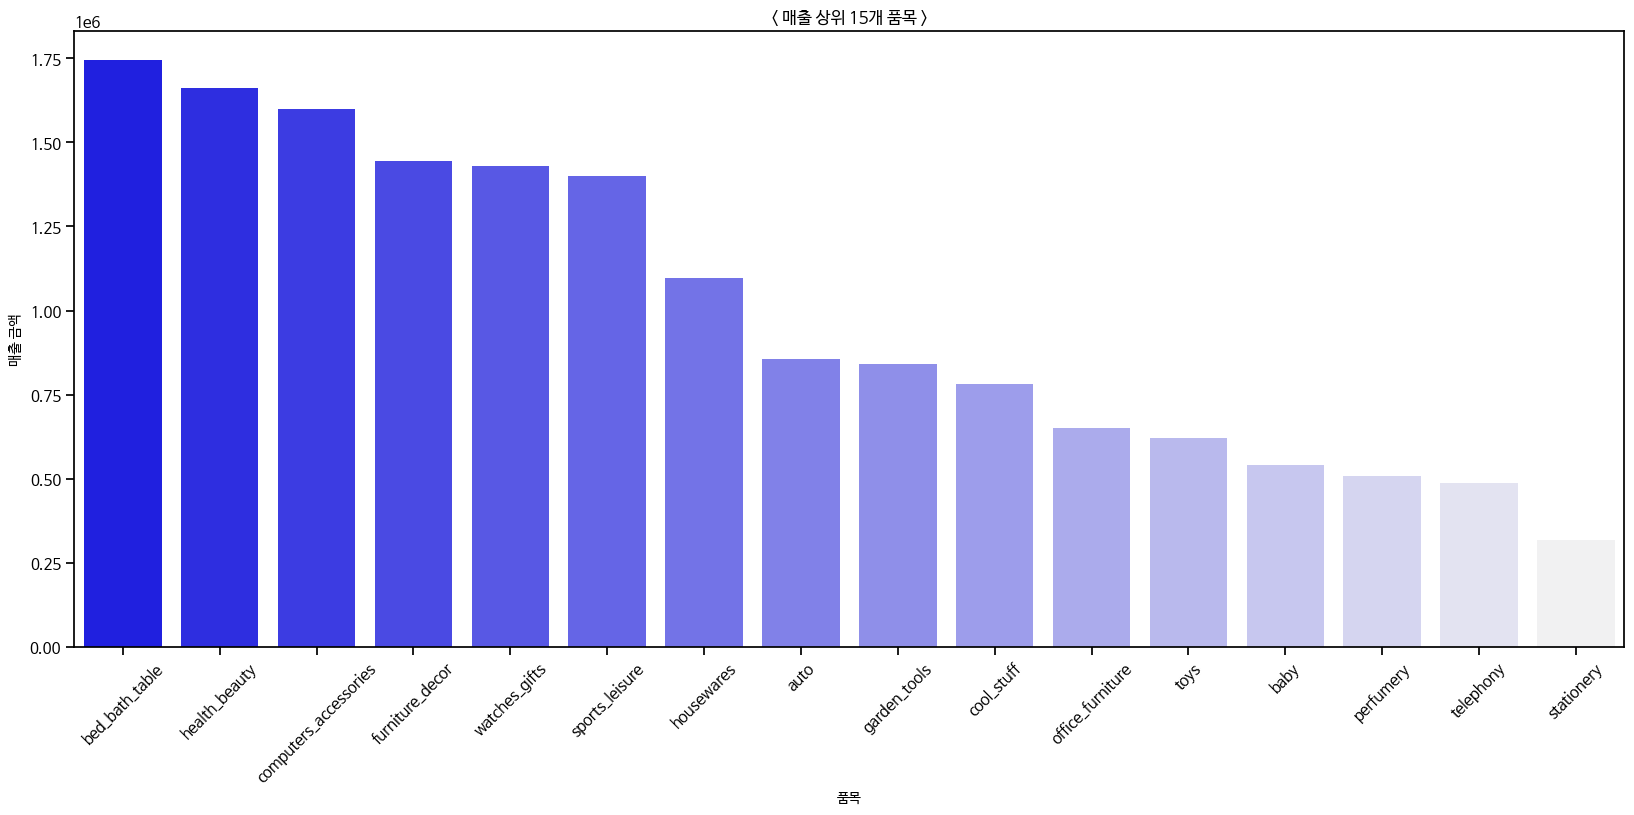

In [52]:
plt.figure(figsize=(20, 8))
plt.title("< 매출 상위 15개 품목 >", fontsize=12)
sns.barplot(data=top15, x='product_category_name_english', y='payment_value', palette=palette)

plt.xticks(rotation=45)
plt.ylabel('매출 금액', fontsize=10)
plt.xlabel('품목', fontsize=10);

In [53]:
# sales_rank.head(17)

# 매출 기준, 상위 10개 품목 확인
- 매출 상위 top10 품목 확인

In [54]:
# 매출의 약 62%가 top10에서 발생하는 것 확인
top10 = sales_rank.head(10)
top10 = top10.reset_index()
top10

,product_category_name_english,payment_value,rate,cumulation
0,bed_bath_table,1743998.80,0.08,0.08
1,health_beauty,1662963.59,0.08,0.16
2,computers_accessories,1599481.06,0.08,0.24
3,furniture_decor,1443963.61,0.07,0.31
4,watches_gifts,1430553.48,0.07,0.38
5,sports_leisure,1400223.07,0.07,0.45
6,housewares,1097900.09,0.05,0.50
7,auto,855095.68,0.04,0.54
8,garden_tools,840721.59,0.04,0.58
9,cool_stuff,781933.97,0.04,0.62


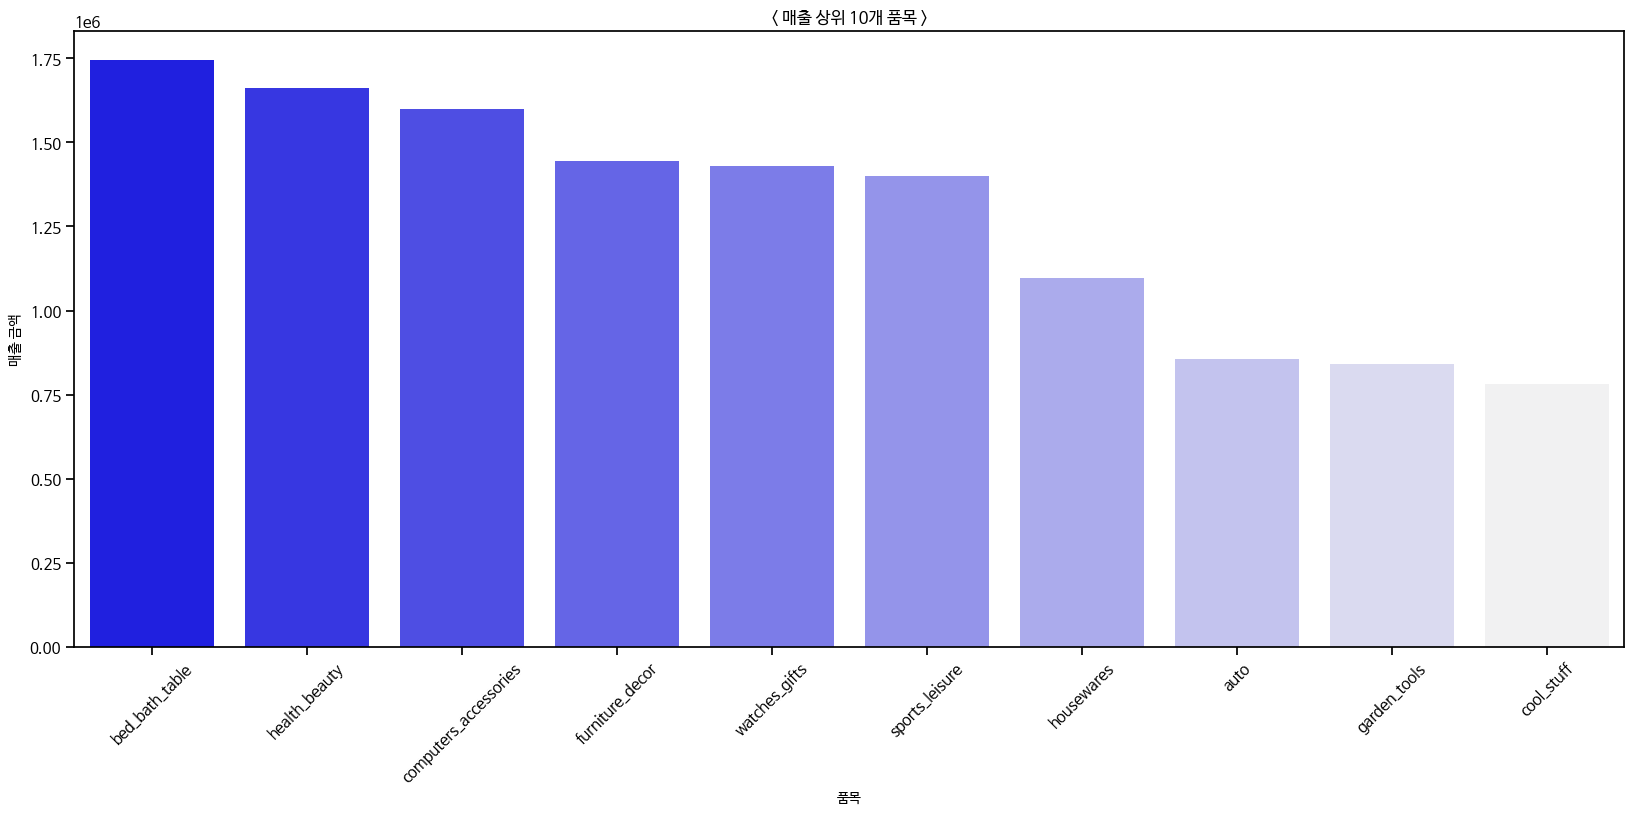

In [55]:
plt.figure(figsize=(20, 8))
plt.title("< 매출 상위 10개 품목 >", fontsize=12)
sns.barplot(data=top10, x='product_category_name_english', y='payment_value', palette=palette)

plt.xticks(rotation=45)
plt.ylabel('매출 금액', fontsize=10)
plt.xlabel('품목', fontsize=10);